In [1]:
import matplotlib.pyplot as plt
import numpy as np
from holiday_card.trees import string_art
from holiday_card.hershey_text import construct_message, transform_message,load_font, construct_bboxes, transform_strokes, cross_out_bbox

In [2]:
plt.rcParams['figure.dpi'] = 300

In [3]:
scripts = load_font("data/scripts.jhf")
futural = load_font("data/futural.jhf")
futuram = load_font("data/futuram.jhf")

In [4]:
def render_gcode(x_strokes, y_strokes, draw_depth, safe_depth, destination):
    for x_stroke, y_stroke in zip(x_strokes, y_strokes):
        destination.write(f"G0 X{x_stroke[0]} Y{y_stroke[0]} Z{safe_depth}\n")
        destination.write(f"G0 Z{draw_depth}\n")
        for x,y in zip(x_stroke[1:], y_stroke[1:]):
            destination.write(f"G1 X{x} Y{y} F1000\n")
        destination.write(f"G0 Z{safe_depth}\n")
    destination.write(f"G0 X230 Y180 Z0\n")
    

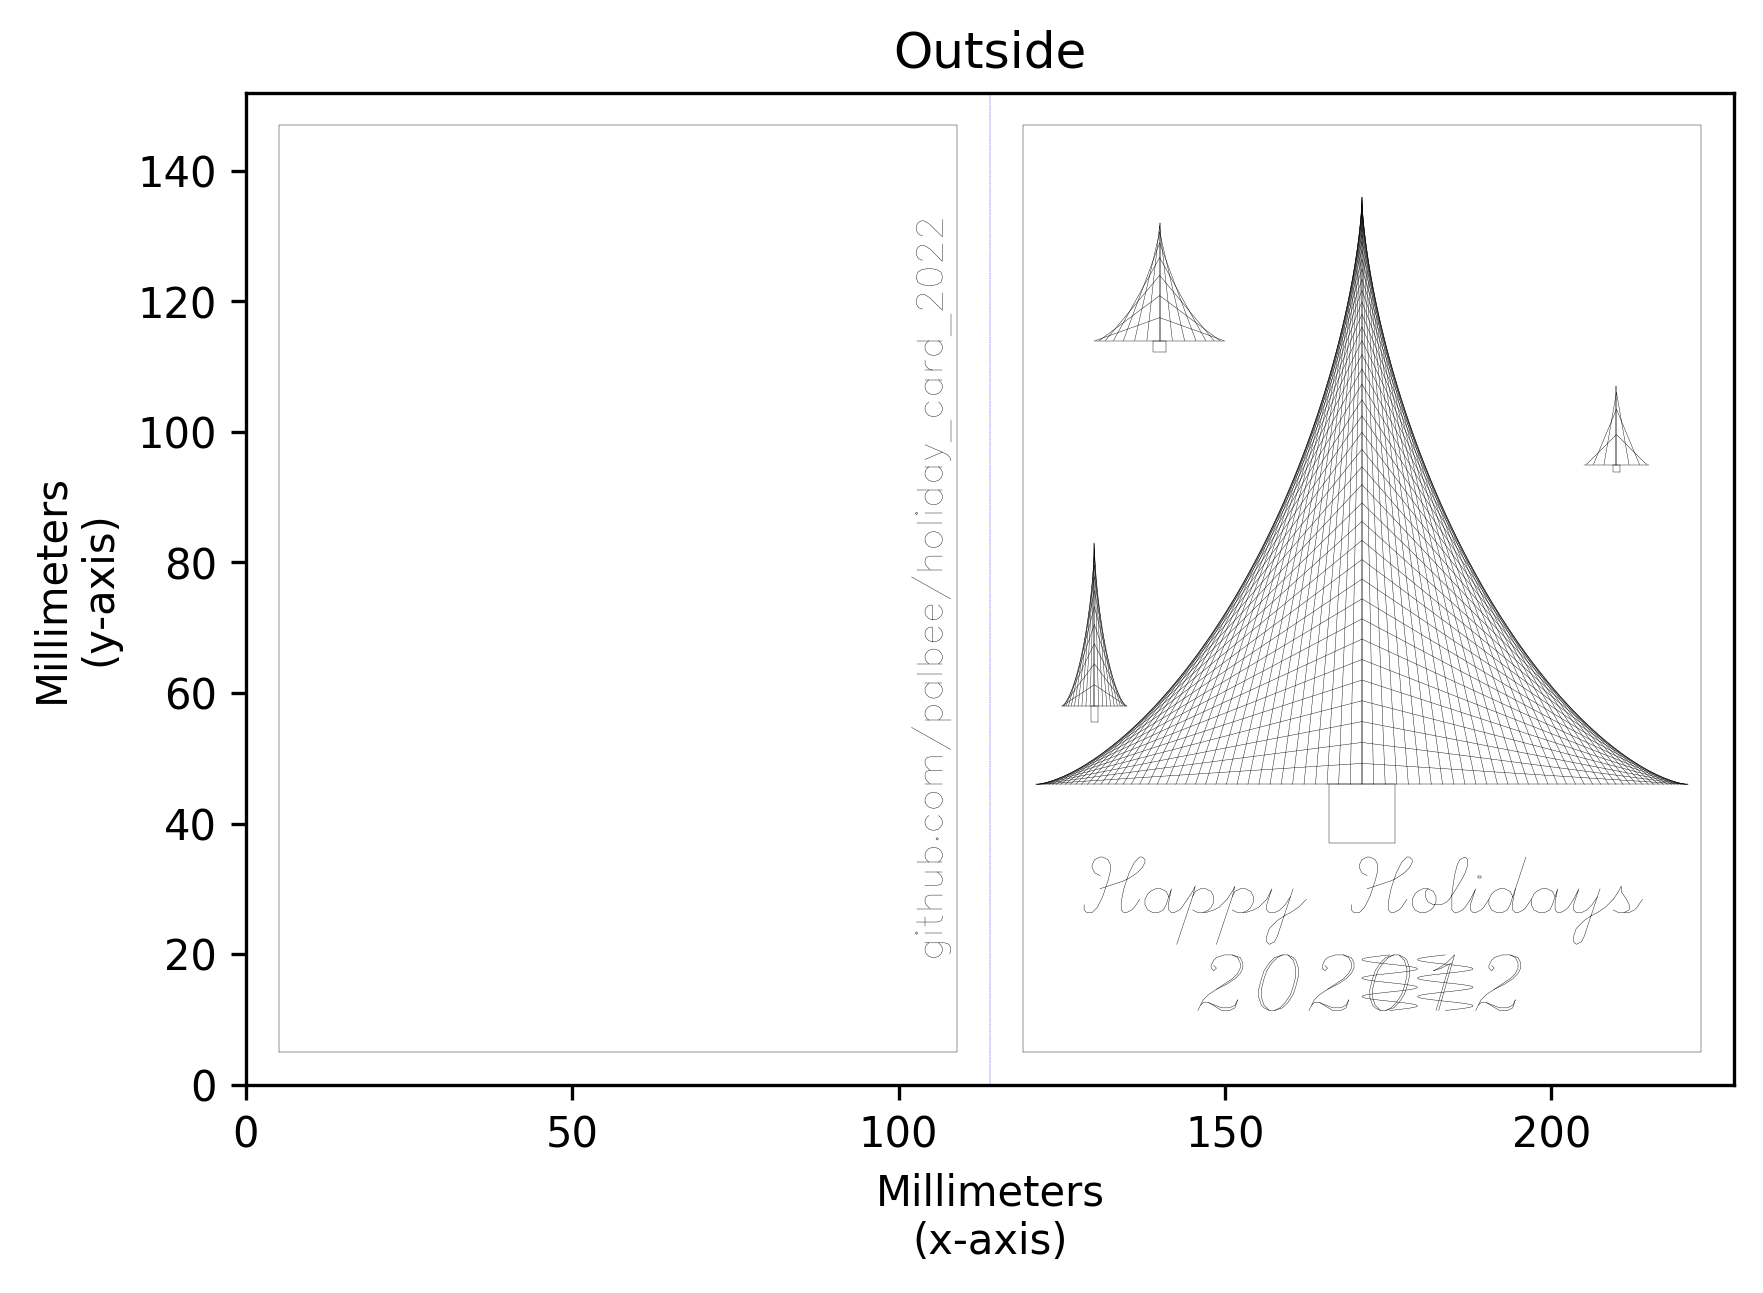

In [5]:
x_segments = []
y_segments = []

# Front
trees = ((100,90,45, 171, 46), # width, height,n_lines, base_x, base_y
         (20,18,9,140,114),
         (10,12,5,210,95),
         (10,25,13,130,58),
        )

for tree in trees:
    tree_x, tree_y = string_art(*tree)
    x_segments.extend(tree_x)
    y_segments.extend(tree_y)

x_message, y_message = construct_message("Happy Holidays", scripts, center=True)
x_message, y_message = transform_message(x_message, y_message, height=15, base_x = 171, base_y=30)        
x_segments.extend(x_message)
y_segments.extend(y_message)


x_message, y_message = construct_message("202012", scripts, center=True)
x_bbox, y_bbox = construct_bboxes("202012", scripts, center=True)
for cross_out in (3,4):
    x_squig, y_squig = cross_out_bbox(x_bbox[cross_out], y_bbox[cross_out], cycles=3)
    x_message.extend(x_squig)
    y_message.extend(y_squig)
x_message, y_message = transform_message(x_message, y_message, height=15, base_x = 171, base_y=15)       
x_segments.extend(x_message)
y_segments.extend(y_message)


# Back
x_url, y_url = construct_message("github.com/palbee/holiday_card_2022", futural, center=True)
x_url, y_url = transform_message(x_url, y_url, height=6,base_x=105,base_y=76, rotation=np.deg2rad(90))
x_segments.extend(x_url)
y_segments.extend(y_url)

fig, ax = plt.subplots()
for x,y in zip(x_segments,y_segments):
    ax.plot(x,y, lw=0.1, color="black")
    
ax.set_aspect(1)
ax.set(xlim=(0,228),ylim=(0,152))
ax.set_xlabel("Millimeters\n(x-axis)")
ax.set_ylabel("Millimeters\n(y-axis)")
ax.set_title("Outside")
ax.plot([114,114], [0,228], lw=0.1, color="blue", ls="dashed")
ax.plot([5,109,109,5, 5],[5,5,147,147, 5], color='black', lw=0.1)
ax.plot([119,223,223,119, 119],[5,5,147,147, 5], color='black', lw=0.1)

plt.show()

with open("outside.gcode", "w") as destination:
    render_gcode(x_segments, y_segments, -16.25, -14.5, destination)


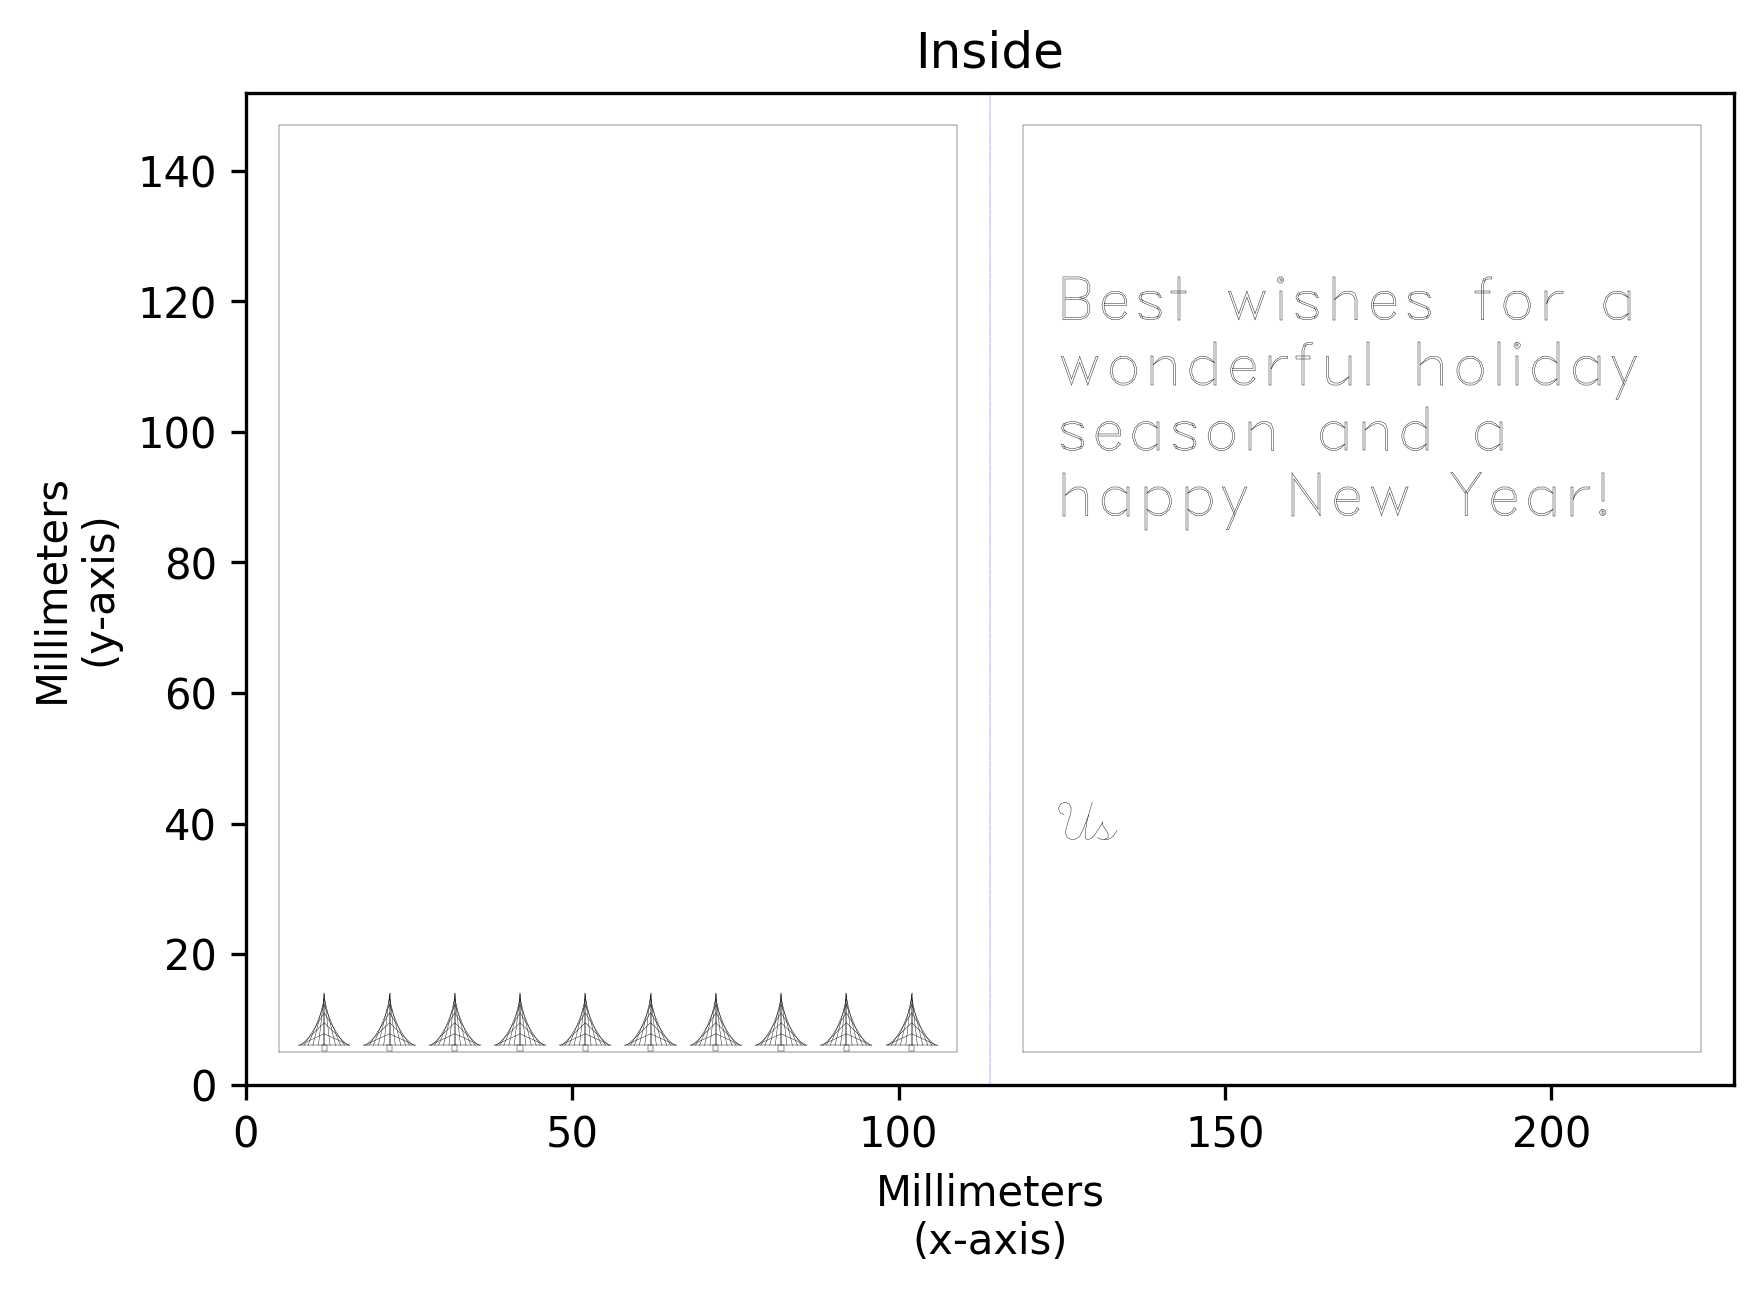

In [6]:
x_segments = []
y_segments = []

# Left
message_lines = ["Best wishes for a","wonderful holiday","season and a","happy New Year!"]
for index, message in enumerate(message_lines):
    x_message, y_message = construct_message(message, futuram, center=False)
    x_message, y_message = transform_message(x_message, y_message, height=10, base_x = 124, base_y=120-(index *10))        
    x_segments.extend(x_message)
    y_segments.extend(y_message)

message_lines = ["Us"]
for index, message in enumerate(message_lines):
    x_message, y_message = construct_message(message, scripts, center=False)
    x_message, y_message = transform_message(x_message, y_message, height=10, base_x = 124, base_y=40)        
    x_segments.extend(x_message)
    y_segments.extend(y_message)


# Right
for x in range(12,110,10):
    tree_x, tree_y = string_art(8,8,8,x,6)#  width, height,n_lines, base_x, base_y
    x_segments.extend(tree_x)
    y_segments.extend(tree_y)
    
    
fig, ax = plt.subplots()
for x,y in zip(x_segments,y_segments):
    ax.plot(x,y, lw=0.1, color="black")
    
ax.set_aspect(1)
ax.set(xlim=(0,228),ylim=(0,152))
ax.set_xlabel("Millimeters\n(x-axis)")
ax.set_ylabel("Millimeters\n(y-axis)")
ax.plot([114,114], [0,228], lw=0.1, color="blue", ls="dashed")
ax.plot([5,109,109,5, 5],[5,5,147,147, 5], color='black', lw=0.1)
ax.plot([119,223,223,119, 119],[5,5,147,147, 5], color='black', lw=0.1)
ax.set_title("Inside")
plt.show()

with open("inside.gcode", "w") as destination:
    render_gcode(x_segments, y_segments, -16.25, -14.5, destination)


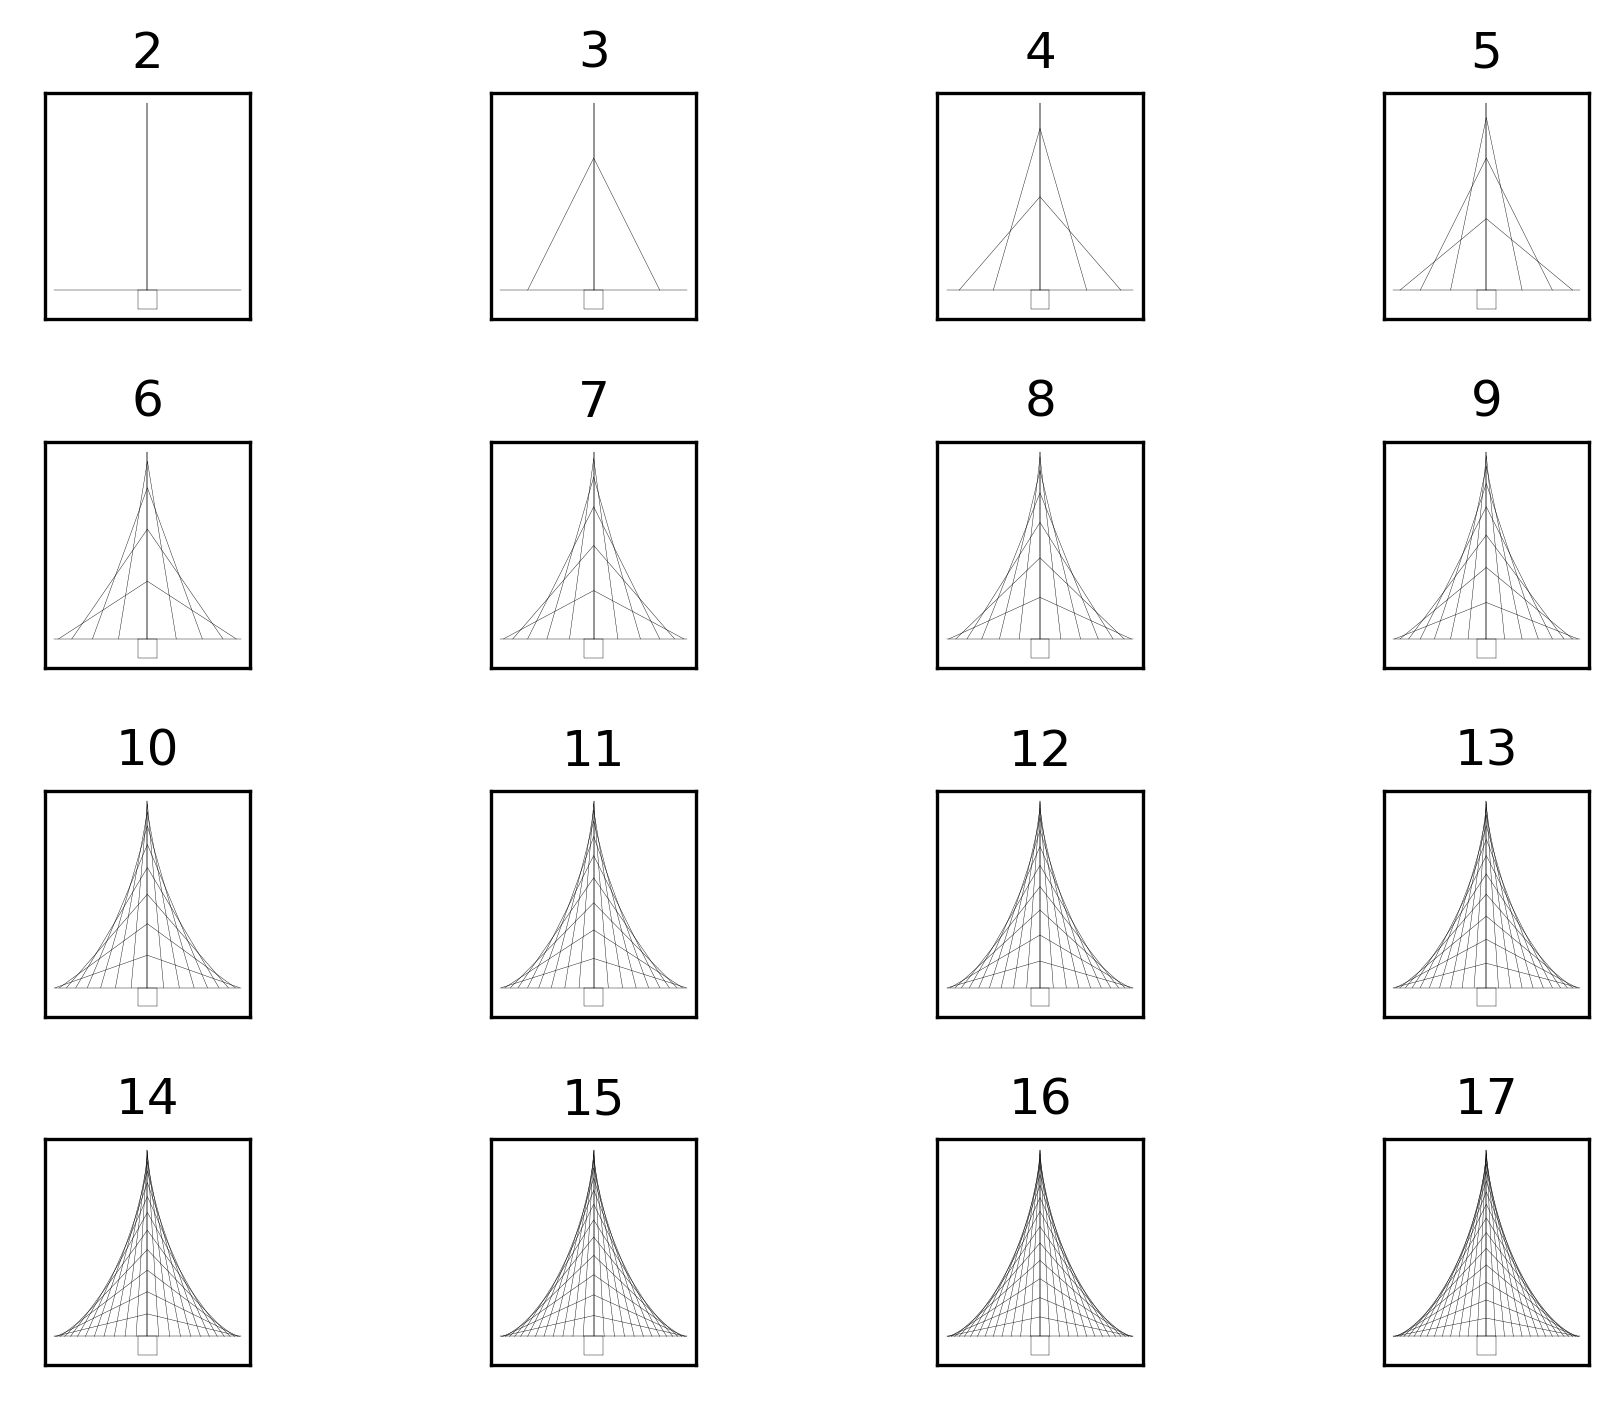

In [7]:
ncols = 4
nrows = 4
fig, axs = plt.subplots(nrows=nrows, ncols = ncols, layout="tight")
for index, n_lines in enumerate(range(2,2+ncols*nrows)):
    ax = axs[index // ncols][index %ncols]
    segments_x, segments_y = string_art(n_steps=n_lines)
    for x, y in zip(segments_x, segments_y):
        ax.plot(x, y, lw=0.1, color="black")
        ax.set_aspect(1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"{n_lines}")
plt.show()